
# **Convoluções, Desfoque e Nitidez de Imagens**

Topicos:
1. Operações de convolução
2. Desfoque
3. Remoção de ruído
4. Nitidez

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def imshow(image = None, size = 10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

### **Desfoque usando Convoluções**

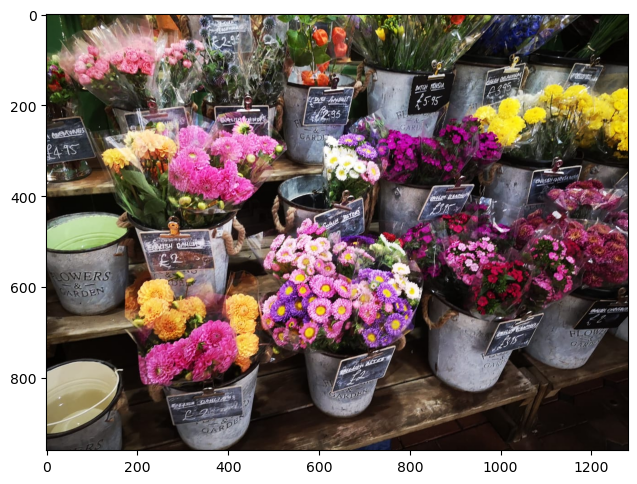

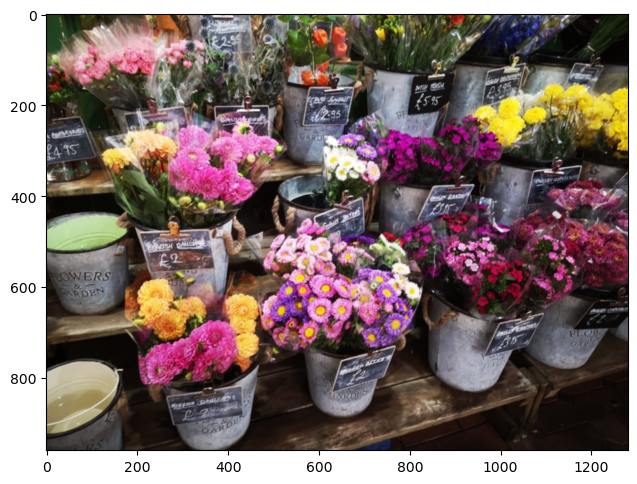

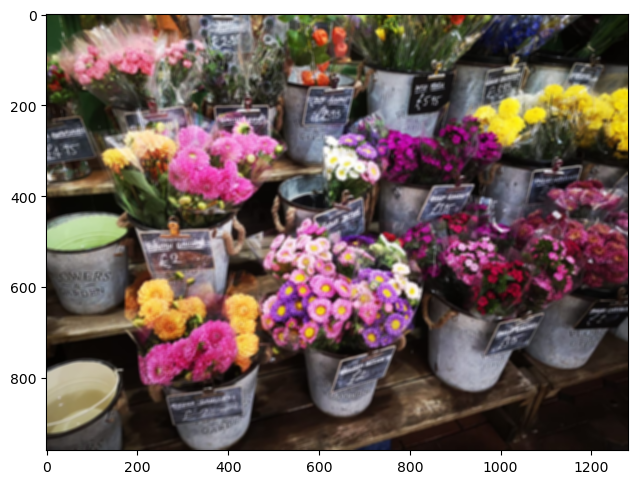

In [2]:

# Imagem de teste
image = cv2.imread('images/flowers.jpeg')
imshow(image)

# Cria kernel 3 x 3
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# Usamos o cv2.filter2D para convoluir o kernel com uma imagem.
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow(blurred)

# Criando kernel de 7 x 7.
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow(blurred2)

### **Outros métodos de desfoque comumente usados no OpenCV**
- Desfoque regular
- Desfoque Gaussiano
- Desfoque Mediano

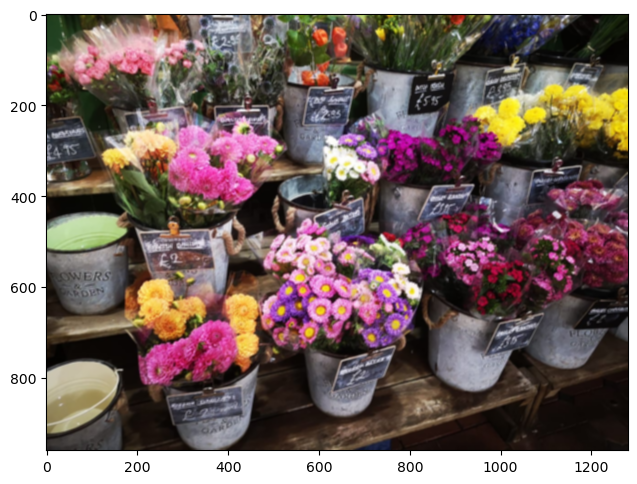

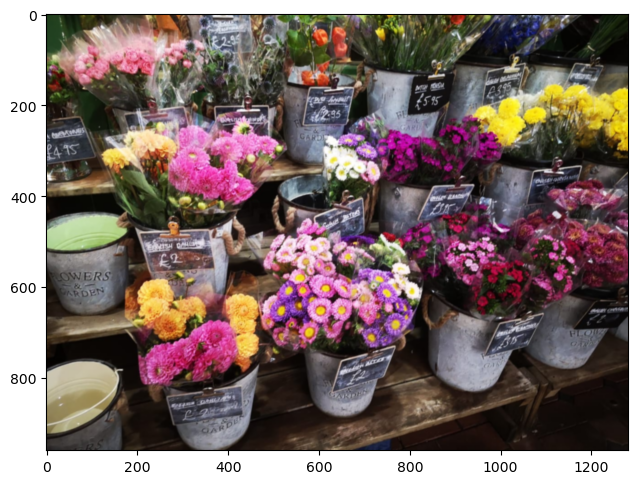

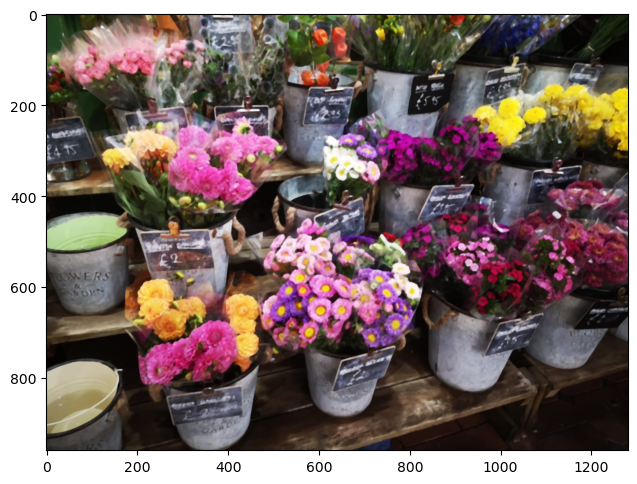

In [6]:

blur = cv2.blur(image, (5,5))
imshow(blur)

Gaussian = cv2.GaussianBlur(image, (5,5), 1)
imshow(Gaussian)

median = cv2.medianBlur(image, 5)
imshow(median)

### **Filtro Bilateral**
#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```
- **src**	Imagem de origem de 8 bits ou ponto flutuante, com 1 ou 3 canais.
- **dst**	Imagem de destino do mesmo tamanho e tipo que src.
- **d**	Diâmetro de cada vizinhança de pixel que é usada durante o filtro. Se for não positivo, será calculado a partir de sigmaSpace.
- **sigmaColor**	Sigma do filtro no espaço de cor. Um valor maior do parâmetro significa que cores mais distantes dentro da vizinhança de pixel (veja sigmaSpace) serão misturadas, resultando em áreas maiores de cor semi-igual.
- **sigmaSpace**	Sigma do filtro no espaço de coordenadas. Um valor maior do parâmetro significa que pixels mais distantes influenciarão uns aos outros, desde que suas cores estejam suficientemente próximas (veja sigmaColor). Quando d>0, especifica o tamanho da vizinhança, independentemente de sigmaSpace. Caso contrário, d é proporcional a sigmaSpace.
- **borderType**	modo de borda usado para extrapolar pixels fora da imagem.

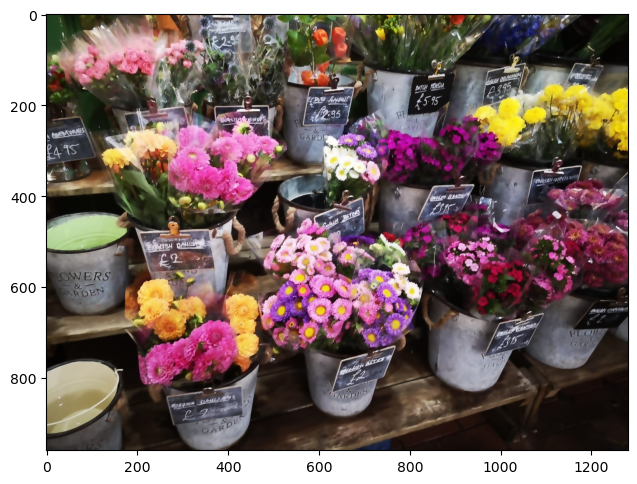

In [7]:
# O filtro bilateral é muito eficaz na remoção de ruídos 
# enquanto mantém as bordas nítidas.
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow(bilateral)

## **Redução de Ruído de Imagem - Denoising Não Local Médio**

Existem 4 variações do Denoising Não Local Médio:

- cv2.fastNlMeansDenoising() - funciona com imagens em escala de cinza.
- cv2.fastNlMeansDenoisingColored() - funciona com imagens coloridas.
- cv2.fastNlMeansDenoisingMulti() - funciona com sequência de imagens capturadas em curto período de tempo (imagens em escala de cinza).
- cv2.fastNlMeansDenoisingColoredMulti() - mesmo que o anterior, mas para imagens coloridas.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21)```

#### Parâmetros para fastNlMeansDenoisingColored:

- **src** - Imagem de entrada de 8 bits com 3 canais.
- **dst** - Imagem de saída com o mesmo tamanho e tipo que src.
- **templateWindowSize** - Tamanho em pixels do patch de modelo usado para calcular os pesos. Deve ser ímpar. Valor recomendado: 7 pixels.
- **searchWindowSize** - Tamanho em pixels da janela usada para calcular a média ponderada para um determinado pixel. Deve ser ímpar. O tempo de denoising é afetado linearmente: um valor maior de searchWindowSize resulta em maior tempo de denoising. Valor recomendado: 21 pixels.
- **h** - Parâmetro que regula a força do filtro para o componente de luminância. Um valor maior de h remove perfeitamente o ruído, mas também remove os detalhes da imagem. Um valor menor de h preserva os detalhes, mas também preserva algum ruído.
- **hColor** - O mesmo que h, mas para os componentes de cor. Para a maioria das imagens, o valor de 10 é suficiente para remover o ruído colorido sem distorcer as cores.

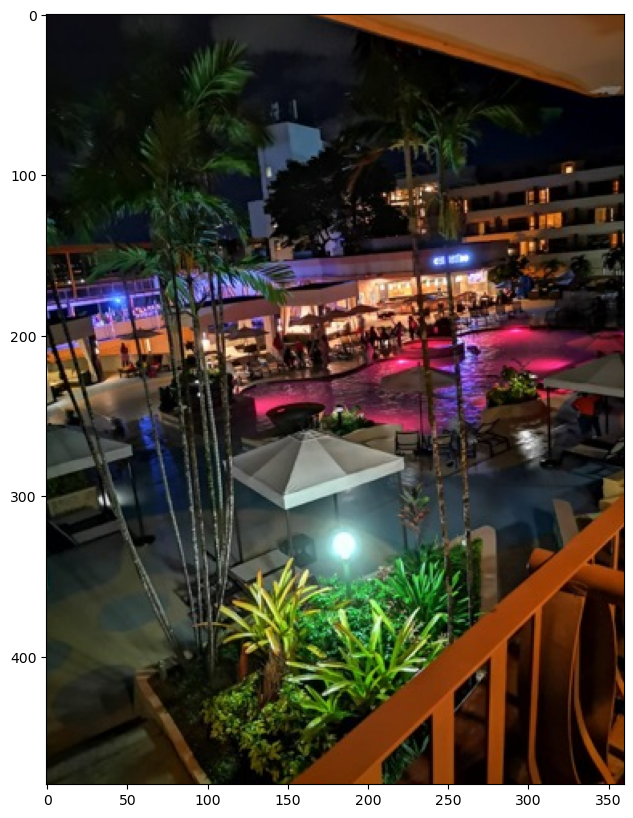

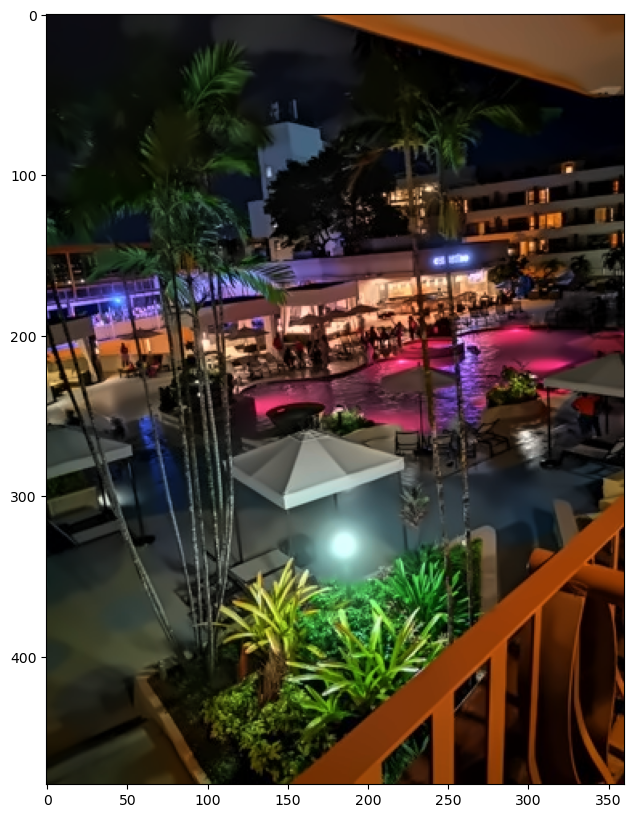

In [8]:
image = cv2.imread('images/hilton.jpeg')
imshow(image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow(dst)

### **Afiação**

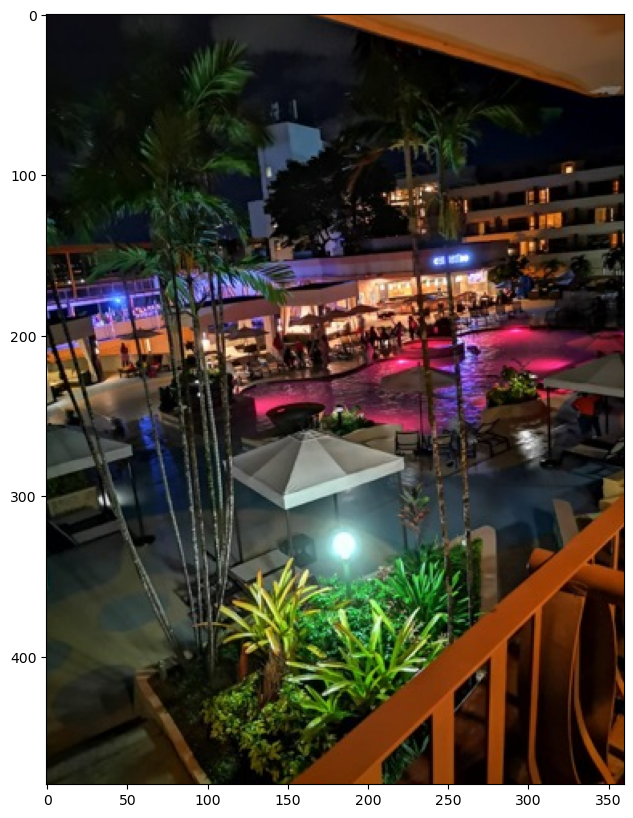

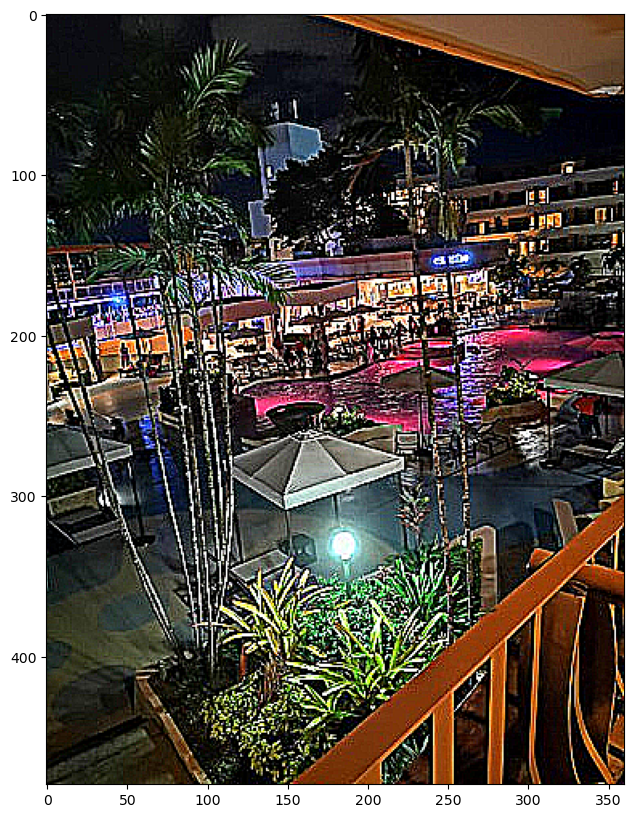

In [9]:
# Imagem de teste
image = cv2.imread('images/hilton.jpeg')
imshow(image)

# Crie o kernel de afiação
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# Aplica kernel
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow(sharpened)